In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv("/content/APY.csv")

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df.head(10)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
5,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Summer,4153.0,2080.0,0.50
6,Andaman and Nicobar Island,NICOBARS,Arecanut,2000,Kharif,1254.0,2000.0,1.59
7,Andaman and Nicobar Island,NICOBARS,Arecanut,2001,Kharif,1254.0,2061.0,1.64
8,Andaman and Nicobar Island,NICOBARS,Arecanut,2002,Whole Year,1258.0,2083.0,1.66
9,Andaman and Nicobar Island,NICOBARS,Arecanut,2003,Whole Year,1261.0,1525.0,1.21


In [ ]:
df.tail(10)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
345326,West Bengal,PURULIA,Wheat,2010,Rabi,2013.0,5152.0,2.56
345327,West Bengal,PURULIA,Wheat,2011,Rabi,1880.0,4206.0,2.24
345328,West Bengal,PURULIA,Wheat,2012,Rabi,1648.0,3310.0,2.01
345329,West Bengal,PURULIA,Wheat,2013,Rabi,1187.0,2675.0,2.25
345330,West Bengal,PURULIA,Wheat,2014,Rabi,1622.0,3663.0,2.26
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54
345335,West Bengal,PURULIA,Wheat,2019,Rabi,516.0,931.0,1.80


In [ ]:
df.shape


(345336, 8)

In [ ]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [ ]:
df.rename(columns={'District ': 'District', 'Area ':'Area'}, inplace=True)


In [ ]:
df['Season'].unique()

array(['Kharif     ', 'Rabi       ', 'Autumn     ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

In [ ]:
season_mapping = {
    'Kharif     ': 'Kharif',
    'Rabi       ': 'Rabi',
    'Whole Year ': 'Whole Year',
    'Autumn     ': 'Autumn',
    'Summer     ': 'Summer',
    'Winter     ': 'Winter'
}

df['Season'] = df['Season'].replace(season_mapping)


In [ ]:
df['Season'].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

In [ ]:
df['State'].unique()


array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
state_mapping = {
    'The Dadra And Nagar Haveli': 'Dadra And Nagar Haveli',
    'Laddak': 'Ladakh'
}

#df['State'].str.capitalize().unique() #Convert column values to lowercase with the first letter capitalized
df['State'] = df['State'].str.title().str.strip() #Capitalize the first letter of each word

df['State'] = df['State'].replace(state_mapping)
df['State'].unique()

array(['Andaman And Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [ ]:
all_state = df['State'].unique()
print(type(all_state))
print(all_state.size)
print(all_state)

<class 'numpy.ndarray'>
36
['Andaman And Nicobar Island' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra And Nagar Haveli'
 'Daman And Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu And Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [ ]:
df[df['State'] == 'Maharashtra']['District'].nunique()

36

In [ ]:
df[df['State'] == 'Maharashtra']['District'].unique()


array(['AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD', 'BEED',
       'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR',
       'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PALGHAR',
       'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI', 'SATARA',
       'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM', 'YAVATMAL',
       'MUMBAI SUBURBAN', 'MUMBAI'], dtype=object)

In [ ]:
df['District'] = df['District'].str.title().str.strip()


In [ ]:
df[df['State'] == 'Maharashtra']['District'].unique()


array(['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed',
       'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli',
       'Gondia', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
       'Nagpur', 'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Palghar',
       'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli', 'Satara',
       'Sindhudurg', 'Solapur', 'Thane', 'Wardha', 'Washim', 'Yavatmal',
       'Mumbai Suburban', 'Mumbai'], dtype=object)

In [ ]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Cowpea(Lobia)', 'Dry chillies', 'Ginger', 'Groundnut',
       'Maize', 'Moong(Green Gram)', 'Oilseeds total',
       'Other Kharif pulses', 'other oilseeds', 'Rapeseed &Mustard',
       'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Sweet potato',
       'Tapioca', 'Turmeric', 'Urad', 'Bajra', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Garlic', 'Gram', 'Guar seed', 'Horse-gram',
       'Jowar', 'Linseed', 'Masoor', 'Mesta', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Potato', 'Ragi', 'Safflower', 'Sannhamp',
       'Small millets', 'Soyabean', 'Tobacco', 'Wheat',
       'Peas & beans (Pulses)', 'Jute', 'Barley', 'Khesari', 'Moth',
       'Other Cereals', 'Cardamom', 'Other Summer Pulses', nan],
      dtype=object)

In [ ]:
df.dtypes

,0
State,object
District,object
Crop,object
Crop_Year,int64
Season,object
Area,float64
Production,float64
Yield,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [ ]:
df.isnull()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
345331,False,False,False,False,False,False,False,False
345332,False,False,False,False,False,False,False,False
345333,False,False,False,False,False,False,False,False
345334,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
State,0
District,0
Crop,9
Crop_Year,0
Season,0
Area,0
Production,4948
Yield,0


In [ ]:
df[df['Crop'].isna()]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
273741,Tamil Nadu,Coimbatore,NaN,1998,Rabi,20.0,1.0,0.05
273742,Tamil Nadu,Dindigul,NaN,2002,Rabi,1.0,0.0,0.00
273743,Tamil Nadu,Krishnagiri,NaN,2004,Rabi,1.0,NaN,0.00
273744,Tamil Nadu,Namakkal,NaN,1998,Rabi,250.0,13.0,0.05
273745,Tamil Nadu,Ramanathapuram,NaN,2006,Rabi,3.0,NaN,0.00
273746,Tamil Nadu,Salem,NaN,1999,Rabi,25.0,12.0,0.48
273747,Tamil Nadu,The Nilgiris,NaN,1998,Rabi,430.0,20.0,0.05
273748,Tamil Nadu,Tiruppur,NaN,2011,Kharif,2.0,NaN,0.00
273749,Tamil Nadu,Vellore,NaN,2006,Rabi,4.0,NaN,0.00


In [ ]:
df.dropna(subset=['Crop'], inplace=True)

In [ ]:
df[df['Production'].isna()]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
11,Andaman And Nicobar Island,Nicobars,Arecanut,2005,Whole Year,795.67,NaN,0.0
270,Andaman And Nicobar Island,South Andamans,Cowpea(Lobia),2016,Rabi,2.00,NaN,0.0
278,Andaman And Nicobar Island,Nicobars,Dry chillies,2005,Whole Year,17.00,NaN,0.0
770,Andhra Pradesh,Vizianagaram,Arecanut,2011,Whole Year,1.00,NaN,0.0
833,Andhra Pradesh,Anantapur,Arhar/Tur,2016,Rabi,1.00,NaN,0.0
...,...,...,...,...,...,...,...,...
338997,West Bengal,Purba Bardhaman,Moong(Green Gram),2005,Summer,1.00,NaN,0.0
339699,West Bengal,Medinipur West,Peas & beans (Pulses),2010,Rabi,2.00,NaN,0.0
340760,West Bengal,Purulia,Rapeseed &Mustard,2001,Rabi,427.00,NaN,0.0
340761,West Bengal,Purulia,Rapeseed &Mustard,2002,Rabi,522.00,NaN,0.0


In [ ]:
df[(df['Yield'] == 0.0) & (df['Production'].isna())]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
11,Andaman And Nicobar Island,Nicobars,Arecanut,2005,Whole Year,795.67,NaN,0.0
270,Andaman And Nicobar Island,South Andamans,Cowpea(Lobia),2016,Rabi,2.00,NaN,0.0
278,Andaman And Nicobar Island,Nicobars,Dry chillies,2005,Whole Year,17.00,NaN,0.0
770,Andhra Pradesh,Vizianagaram,Arecanut,2011,Whole Year,1.00,NaN,0.0
833,Andhra Pradesh,Anantapur,Arhar/Tur,2016,Rabi,1.00,NaN,0.0
...,...,...,...,...,...,...,...,...
338997,West Bengal,Purba Bardhaman,Moong(Green Gram),2005,Summer,1.00,NaN,0.0
339699,West Bengal,Medinipur West,Peas & beans (Pulses),2010,Rabi,2.00,NaN,0.0
340760,West Bengal,Purulia,Rapeseed &Mustard,2001,Rabi,427.00,NaN,0.0
340761,West Bengal,Purulia,Rapeseed &Mustard,2002,Rabi,522.00,NaN,0.0


In [ ]:
df['Production']=df['Production'].fillna(0.0)


In [ ]:
df.isnull().sum()


,0
State,0
District,0
Crop,0
Crop_Year,0
Season,0
Area,0
Production,0
Yield,0


In [ ]:
df.describe()


,Crop_Year,Area,Production,Yield
count,345327.000000,3.453270e+05,345327.0,345327.000000
mean,2008.887680,1.167177e+04,0.0,79.425204
std,6.564326,4.584135e+04,0.0,916.690252
min,1997.000000,4.000000e-03,0.0,0.000000
25%,2003.000000,7.400000e+01,0.0,0.550000
50%,2009.000000,5.320000e+02,0.0,1.000000
75%,2015.000000,4.112000e+03,0.0,2.470000
max,2020.000000,8.580100e+06,0.0,43958.330000


In [ ]:
df['Season'].unique()

array(['Kharif', 'Rabi', 'Autumn', 'Summer', 'Whole Year', 'Winter'],
      dtype=object)

**Find the draught year from the data**

In [ ]:
x = df[(df['Yield'] == 0) & (df['Production'] == 0)].sort_values(by=['Crop_Year', 'State'])
x

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
23780,Assam,Karbi Anglong,Castor seed,1997,Kharif,515.0,0.0,0.0
23833,Assam,Lakhimpur,Castor seed,1997,Kharif,225.0,0.0,0.0
37740,Assam,Kamrup,Tobacco,1997,Whole Year,368.0,0.0,0.0
333411,West Bengal,Darjeeling,Cardamom,1997,Whole Year,2674.0,0.0,0.0
343678,West Bengal,Paraganas South,Sunflower,1997,Whole Year,278.0,0.0,0.0
...,...,...,...,...,...,...,...,...
301603,Uttar Pradesh,Deoria,Moong(Green Gram),2019,Kharif,1.0,0.0,0.0
302893,Uttar Pradesh,Muzaffarnagar,Moong(Green Gram),2019,Kharif,1.0,0.0,0.0
313866,Uttar Pradesh,Shamli,Sannhamp,2019,Kharif,1.0,0.0,0.0
315025,Uttar Pradesh,Meerut,Sesamum,2019,Kharif,1.0,0.0,0.0


from matplotlib import pyplot as plt
x['Crop_Year'].plot(kind='hist', bins=20, title='Crop_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
x.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Crop_Year', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Crop_Year']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Crop_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Crop_Year')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Crop_Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Crop_Year'}, axis=1)
              .sort_values('Crop_Year', ascending=True))
  xs = counted['Crop_Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Crop_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Crop_Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Production']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Production', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Production')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Production']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Production'}, axis=1)
              .sort_values('Production', ascending=True))
  xs = counted['Production']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Production', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Production')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
x['Crop_Year'].plot(kind='line', figsize=(8, 4), title='Crop_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(x['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x, x='Crop_Year', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(x['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x, x='Area', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

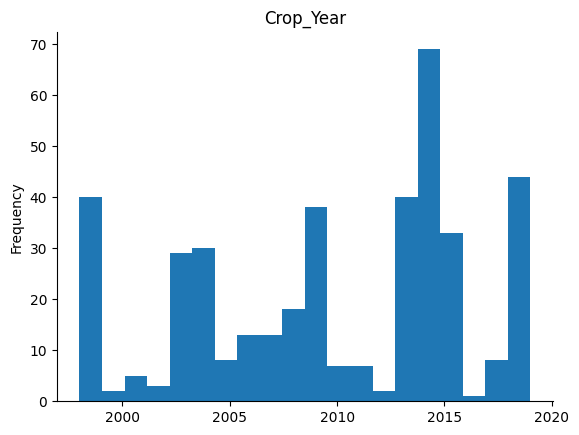

In [ ]:
from matplotlib import pyplot as plt
x['Crop_Year'].plot(kind='hist', bins=20, title='Crop_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
x = df[
    (df['Yield'] == 0) &
    (df['Production'] == 0) &
    (df['State'] == 'Maharashtra')
].sort_values(by=['Crop_Year', 'State'])
x

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
180734,Maharashtra,Akola,Castor seed,1998,Kharif,100.0,0.0,0.0
180760,Maharashtra,Aurangabad,Castor seed,1998,Kharif,100.0,0.0,0.0
180921,Maharashtra,Latur,Castor seed,1998,Kharif,100.0,0.0,0.0
181103,Maharashtra,Wardha,Castor seed,1998,Kharif,100.0,0.0,0.0
185102,Maharashtra,Nashik,Linseed,1998,Rabi,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...
192320,Maharashtra,Nanded,Sesamum,2019,Summer,2.0,0.0,0.0
192469,Maharashtra,Pune,Sesamum,2019,Summer,42.0,0.0,0.0
195004,Maharashtra,Bhandara,Sunflower,2019,Kharif,1.0,0.0,0.0
195288,Maharashtra,Kolhapur,Sunflower,2019,Kharif,3.0,0.0,0.0


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.024247,NaN,0.008561
Area,-0.024247,1.000000,NaN,0.000422
Production,NaN,NaN,NaN,NaN
Yield,0.008561,0.000422,NaN,1.000000


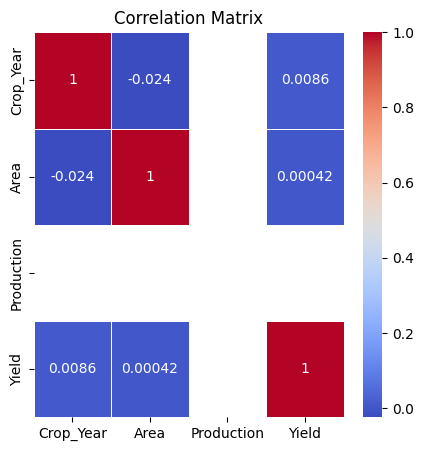

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()